---
---
# Applying the Instrumental Variable Method with Stata
---
---

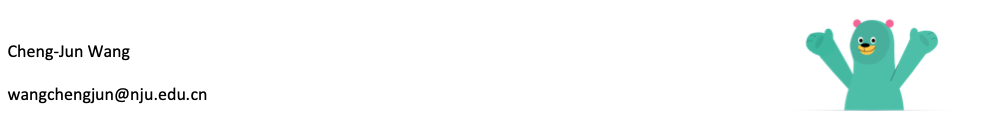


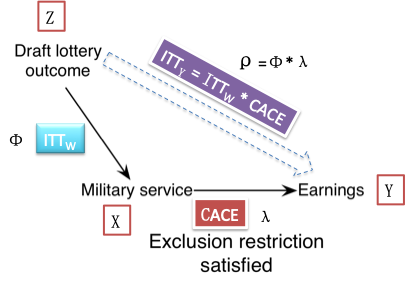

$$Z\rightarrow X \rightarrow Y$$

- Z与X相关， $cov(Z, X) \not= 0$
- Z与$\epsilon$不相关， $cov(Z, \epsilon) = 0$

The first stage regression:

$$X_i = \alpha_1 + \phi_1*Z_i + \epsilon_{1i}    \space \space \space \space (1) $$

The reduced form links instrument and outcomes:

$$Y_i = \alpha_0 + \rho_0*X_i + \epsilon_{0i}   $$  

The 2SLS second stage is the regression of outcomes $Y_i$ on first-stage fitted values $\hat{X}_i$:

$$Y_i = \alpha_2 + \lambda \hat{X}_i + \epsilon_{2i}   \space \space \space \space (2)$$

$$\lambda = \frac{\rho}{\phi} = \frac{C(Y_i, Z_i)/V(Z_i)}{C(X_i, Z_i)/V(Z_i)} = \frac{C(Y_i, Z_i)}{C(X_i, Z_i)} $$

Mincer (1958) studied the impact of education on salary, but omitted the variable of capability.

Griliches (1796) solve this problem using the instrumental variable method.

```stata
* 2sls iv regression
ivregress 2sls wages union (education = meducation feducation)

* 检验工具变量是外生变量
estat overid
* 弱相关检验
estat firststage
* 检验因变量是否内生
estat endog
```


陈强 (2014) 高级计量经济学及stata应用（第二版）.高等教育出版社.PP153-167.

In [1]:
cd "/Users/datalab/github/css/data/" 
use grilic.dta, clear


/Users/datalab/github/css/data



In [2]:
describe


Contains data from grilic.dta
  obs:           758                          
 vars:            12                          1 Feb 2016 09:25
 size:        16,676                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
rns             byte    %8.0g                 south = 1
mrt             byte    %8.0g                 married = 1
smsa            byte    %8.0g                 big cities =1
med             byte    %8.0g                 mother's education
iq              int     %8.0g                 IQ
kww             byte    %8.0g                 KWW
age             byte    %8.0g                 age
s               byte    %8.0g                 schooling
expr            float   %9.0g                 experience
tenure          byte    %8.0g                 t

In [3]:
sum


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         rns |        758    .2691293    .4438001          0          1
         mrt |        758    .5145119    .5001194          0          1
        smsa |        758    .7044855     .456575          0          1
         med |        758    10.91029     2.74112          0         18
          iq |        758    103.8562    13.61867         54        145
-------------+---------------------------------------------------------
         kww |        758    36.57388    7.302247         12         56
         age |        758    21.83509    2.981756         16         30
           s |        758    13.40501    2.231828          9         18
        expr |        758    1.735429    2.105542          0     11.444
      tenure |        758    1.831135     1.67363          0         10
-------------+-------------------------------------------------

In [4]:
* correlation between iq and education
pwcorr iq s, sig


             |       iq        s
-------------+------------------
          iq |   1.0000 
             |
             |
           s |   0.5131   1.0000 
             |   0.0000
             |


In [5]:
reg iq s med kww expr tenure rns smsa, r


Linear regression                               Number of obs     =        758
                                                F(7, 750)         =      47.74
                                                Prob > F          =     0.0000
                                                R-squared         =     0.3066
                                                Root MSE          =     11.393

------------------------------------------------------------------------------
             |               Robust
          iq |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           s |   2.467021   .2327755    10.60   0.000     2.010052     2.92399
         med |   .3470133   .1681356     2.06   0.039     .0169409    .6770857
         kww |   .3081811   .0646794     4.76   0.000     .1812068    .4351553
        expr |  -.4501353   .2391647    -1.88   0.060    -.9196471    .0193766
      tenure |

In [6]:
predict iq_hat

(option xb assumed; fitted values)


In [12]:
reg lnw iq_hat s expr tenure rns smsa, r


Linear regression                               Number of obs     =        758
                                                F(6, 751)         =      71.38
                                                Prob > F          =     0.0000
                                                R-squared         =     0.3575
                                                Root MSE          =     .34519

------------------------------------------------------------------------------
             |               Robust
         lnw |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      iq_hat |   .0139284   .0058153     2.40   0.017     .0025123    .0253446
           s |   .0607803    .018068     3.36   0.001     .0253106    .0962501
        expr |   .0433237   .0068103     6.36   0.000     .0299542    .0566932
      tenure |   .0296442   .0083202     3.56   0.000     .0133106    .0459778
         rns |

In [8]:
ivregress 2sls lnw s expr tenure rns smsa (iq = med kww), r first


First-stage regressions
-----------------------

                                                Number of obs     =        758
                                                F(   7,    750)   =      47.74
                                                Prob > F          =     0.0000
                                                R-squared         =     0.3066
                                                Adj R-squared     =     0.3001
                                                Root MSE          =    11.3931

------------------------------------------------------------------------------
             |               Robust
          iq |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           s |   2.467021   .2327755    10.60   0.000     2.010052     2.92399
        expr |  -.4501353   .2391647    -1.88   0.060    -.9196471    .0193766
      tenure |   .2059531    .269562     0.7

In [9]:
* 工具变量是外生变量的过度识别检验
estat overid


  Test of overidentifying restrictions:

  Score chi2(1)          =  .151451  (p = 0.6972)


p = 0.697，故接受原假设，认为iq为外生变量，与扰动项不相关。

In [10]:
* 弱相关检验
quietly ivregress 2sls lnw s expr tenure rns smsa (iq = med kww)
estat firststage




  First-stage regression summary statistics
  --------------------------------------------------------------------------
               |            Adjusted      Partial
      Variable |   R-sq.       R-sq.        R-sq.      F(2,750)   Prob > F
  -------------+------------------------------------------------------------
            iq |  0.3066      0.3001       0.0382       14.9058    0.0000
  --------------------------------------------------------------------------


  Minimum eigenvalue statistic = 14.9058     

  Critical Values                      # of endogenous regressors:    1
  Ho: Instruments are weak             # of excluded instruments:     2
  ---------------------------------------------------------------------
                                     |    5%     10%     20%     30%
  2SLS relative bias                 |         (not available)
  -----------------------------------+---------------------------------
                                     |   10%     15%  

F统计量为14.91， 超过10，故认为不存在弱工具变量

In [11]:
* 检验是否存在内生解释变量
estat endog


  Tests of endogeneity
  Ho: variables are exogenous

  Durbin (score) chi2(1)          =  3.87962  (p = 0.0489)
  Wu-Hausman F(1,750)             =  3.85842  (p = 0.0499)


P值小于0.05，故认为iq为内生解释变量

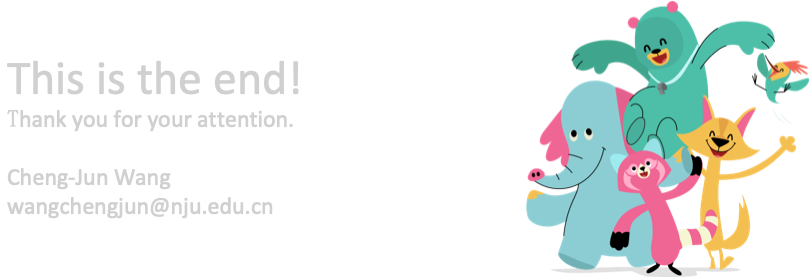

In [15]:
ivregress 2sls lnw s expr tenure rns smsa (iq = med kww mrt age), r


Instrumental variables (2SLS) regression          Number of obs   =        758
                                                  Wald chi2(6)    =     355.73
                                                  Prob > chi2     =     0.0000
                                                  R-squared       =     0.2002
                                                  Root MSE        =     .38336

------------------------------------------------------------------------------
             |               Robust
         lnw |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          iq |  -.0115468   .0056376    -2.05   0.041    -.0225962   -.0004974
           s |   .1373477   .0174989     7.85   0.000     .1030506    .1716449
        expr |   .0338041   .0074844     4.52   0.000      .019135    .0484732
      tenure |    .040564   .0095848     4.23   0.000     .0217781      .05935
         rns |

In [16]:
estat overid


  Test of overidentifying restrictions:

  Score chi2(3)          =  51.5449  (p = 0.0000)


In [40]:
ssc install ivreg2, replace

checking ivreg2 consistency and verifying not already installed...
installing into /Users/datalab/Library/Application Support/Stata/ado/plus/...
installation complete.


In [43]:
ssc install ranktest, replace

checking ranktest consistency and verifying not already installed...
installing into /Users/datalab/Library/Application Support/Stata/ado/plus/...
installation complete.


In [45]:
* https://fmwww.bc.edu/RePEc/bocode/i/ivreg2.ado
ivreg2 lnw s expr tenure rns smsa (iq = med kww mrt age), r


IV (2SLS) estimation
--------------------

Estimates efficient for homoskedasticity only
Statistics robust to heteroskedasticity

                                                      Number of obs =      758
                                                      F(  6,   751) =    58.74
                                                      Prob > F      =   0.0000
Total (centered) SS     =  139.2861498                Centered R2   =   0.2002
Total (uncentered) SS   =  24652.24662                Uncentered R2 =   0.9955
Residual SS             =    111.39959                Root MSE      =    .3834

------------------------------------------------------------------------------
             |               Robust
         lnw |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          iq |  -.0115468   .0056376    -2.05   0.041    -.0225962   -.0004974
           s |   .1373477   .0174989     7

In [25]:
ivregress 2sls lnw s expr tenure rns smsa (iq = med kww), r


Instrumental variables (2SLS) regression          Number of obs   =        758
                                                  Wald chi2(6)    =     370.04
                                                  Prob > chi2     =     0.0000
                                                  R-squared       =     0.2775
                                                  Root MSE        =     .36436

------------------------------------------------------------------------------
             |               Robust
         lnw |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          iq |   .0139284   .0060393     2.31   0.021     .0020916    .0257653
           s |   .0607803   .0189505     3.21   0.001      .023638    .0979227
        expr |   .0433237   .0074118     5.85   0.000     .0287968    .0578505
      tenure |   .0296442    .008317     3.56   0.000     .0133432    .0459452
         rns |

In [26]:
estat overid


  Test of overidentifying restrictions:

  Score chi2(1)          =  .151451  (p = 0.6972)


In [27]:
estat firststage, all forcenonrobust


  First-stage regression summary statistics
  --------------------------------------------------------------------------
               |            Adjusted      Partial       Robust
      Variable |   R-sq.       R-sq.        R-sq.      F(2,750)   Prob > F
  -------------+------------------------------------------------------------
            iq |  0.3066      0.3001       0.0382       13.4028    0.0000
  --------------------------------------------------------------------------


  Shea's partial R-squared
  --------------------------------------------------
               |     Shea's             Shea's
      Variable |  Partial R-sq.   Adj. Partial R-sq.
  -------------+------------------------------------
            iq |     0.0382             0.0305
  --------------------------------------------------


  Minimum eigenvalue statistic = 14.9058     

  Critical Values                      # of endogenous regressors:    1
  Ho: Instruments are weak             # of excluded ins

In [28]:
ivregress liml lnw s expr tenure rns smsa (iq = med kww), r


Instrumental variables (LIML) regression          Number of obs   =        758
                                                  Wald chi2(6)    =     369.62
                                                  Prob > chi2     =     0.0000
                                                  R-squared       =     0.2768
                                                  Root MSE        =     .36454

------------------------------------------------------------------------------
             |               Robust
         lnw |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          iq |   .0139764   .0060681     2.30   0.021     .0020831    .0258697
           s |   .0606362    .019034     3.19   0.001     .0233303    .0979421
        expr |   .0433416   .0074185     5.84   0.000     .0288016    .0578816
      tenure |   .0296237    .008323     3.56   0.000     .0133109    .0459364
         rns |

In [46]:
ivreg2 lnw s expr tenure rns smsa (iq = med kww), r redundant (kww)


IV (2SLS) estimation
--------------------

Estimates efficient for homoskedasticity only
Statistics robust to heteroskedasticity

                                                      Number of obs =      758
                                                      F(  6,   751) =    61.10
                                                      Prob > F      =   0.0000
Total (centered) SS     =  139.2861498                Centered R2   =   0.2775
Total (uncentered) SS   =  24652.24662                Uncentered R2 =   0.9959
Residual SS             =  100.6291971                Root MSE      =    .3644

------------------------------------------------------------------------------
             |               Robust
         lnw |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          iq |   .0139284   .0060393     2.31   0.021     .0020916    .0257653
           s |   .0607803   .0189505     3

In [47]:
ivreg2 lnw s expr tenure rns smsa (iq = med kww)


IV (2SLS) estimation
--------------------

Estimates efficient for homoskedasticity only
Statistics consistent for homoskedasticity only

                                                      Number of obs =      758
                                                      F(  6,   751) =    61.94
                                                      Prob > F      =   0.0000
Total (centered) SS     =  139.2861498                Centered R2   =   0.2775
Total (uncentered) SS   =  24652.24662                Uncentered R2 =   0.9959
Residual SS             =  100.6291971                Root MSE      =    .3644

------------------------------------------------------------------------------
         lnw |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          iq |   .0139284   .0058572     2.38   0.017     .0024485    .0254084
           s |   .0607803   .0186481     3.26   0.001     .0242306    

In [48]:
qui reg lnw iq s expr tenure rns smsa
estimates store ols
qui ivregress 2sls lnw s expr tenure rns smsa (iq = med kww)
estimates store iv
hausman iv ols, constant sigmamore







Note: the rank of the differenced variance matrix (1) does not equal the number
        of coefficients being tested (7); be sure this is what you expect, or
        there may be problems computing the test.  Examine the output of your
        estimators for anything unexpected and possibly consider scaling your
        variables so that the coefficients are on a similar scale.

                 ---- Coefficients ----
             |      (b)          (B)            (b-B)     sqrt(diag(V_b-V_B))
             |       iv          ols         Difference          S.E.
-------------+----------------------------------------------------------------
          iq |    .0139284     .0032792        .0106493        .0054318
           s |    .0607803     .0927874        -.032007        .0163254
        expr |    .0433237     .0393443        .0039794        .0020297
      tenure |    .0296442      .034209       -.0045648        .0023283
         rns |   -.0435271    -.0745325        .0310054  

In [49]:
estat endogenous


  Tests of endogeneity
  Ho: variables are exogenous

  Durbin (score) chi2(1)          =  3.87962  (p = 0.0489)
  Wu-Hausman F(1,750)             =  3.85842  (p = 0.0499)


In [50]:
ivreg2 lnw s expr tenure rns smsa (iq = med kww), r endog(iq)


IV (2SLS) estimation
--------------------

Estimates efficient for homoskedasticity only
Statistics robust to heteroskedasticity

                                                      Number of obs =      758
                                                      F(  6,   751) =    61.10
                                                      Prob > F      =   0.0000
Total (centered) SS     =  139.2861498                Centered R2   =   0.2775
Total (uncentered) SS   =  24652.24662                Uncentered R2 =   0.9959
Residual SS             =  100.6291971                Root MSE      =    .3644

------------------------------------------------------------------------------
             |               Robust
         lnw |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          iq |   .0139284   .0060393     2.31   0.021     .0020916    .0257653
           s |   .0607803   .0189505     3

In [51]:
ivregress gmm lnw s expr tenure rns smsa (iq = med kww)


Instrumental variables (GMM) regression           Number of obs   =        758
                                                  Wald chi2(6)    =     372.75
                                                  Prob > chi2     =     0.0000
                                                  R-squared       =     0.2750
GMM weight matrix: Robust                         Root MSE        =     .36499

------------------------------------------------------------------------------
             |               Robust
         lnw |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          iq |   .0140888   .0060357     2.33   0.020     .0022591    .0259185
           s |   .0603672   .0189545     3.18   0.001     .0232171    .0975174
        expr |   .0431117   .0074112     5.82   0.000     .0285861    .0576373
      tenure |   .0299764   .0082728     3.62   0.000      .013762    .0461908
         rns |

In [52]:
estat overid


  Test of overidentifying restriction:

  Hansen's J chi2(1) = .151451 (p = 0.6972)


In [53]:
ivregress gmm lnw s expr tenure rns smsa (iq = med kww), igmm

Iteration 1: change in beta =  1.753e-05   change in W =  1.100e-02
Iteration 2: change in beta =  4.872e-08   change in W =  7.880e-05
Iteration 3: change in beta =  2.501e-10   change in W =  2.304e-07

Instrumental variables (GMM) regression           Number of obs   =        758
                                                  Wald chi2(6)    =     372.73
                                                  Prob > chi2     =     0.0000
                                                  R-squared       =     0.2750
GMM weight matrix: Robust                         Root MSE        =     .36499

------------------------------------------------------------------------------
             |               Robust
         lnw |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          iq |   .0140901   .0060357     2.33   0.020     .0022603      .02592
           s |   .0603629   .0189548     3.18  

In [57]:
qui reg lnw s expr tenure rns smsa, r
est sto ols_no_iq
qui reg lnw iq s expr tenure rns smsa
est sto olw_with_iq
qui ivregress 2sls lnw s expr tenure rns smsa (iq = med kww), r
est sto tsls
qui ivregress liml lnw s expr tenure rns smsa (iq = med kww), r
est sto liml
qui ivregress gmm lnw s expr tenure rns smsa (iq = med kww)
est sto gmm
qui ivregress gmm lnw s expr tenure rns smsa (iq = med kww), igmm
est sto igmm
estimates table ols_no_iq olw_with_iq tsls liml gmm igmm, b se















-------------------------------------------------------------------------------
    Variable | ols_no_iq    olw_with~q      tsls         liml         gmm      
-------------+-----------------------------------------------------------------
           s |  .10264304    .09278735    .06078035    .06063623    .06036723  
             |  .00620988    .00666594    .01895051    .01903397    .01895452  
        expr |   .0381189    .03934425    .04332367    .04334159    .04311171  
             |  .00661439    .00630571    .00741179     .0074185    .00741117  
      tenure |  .03561456    .03420896    .02964421    .02962365    .02997643  
             |  .00799884    .00771464    .00831697    .00832297    .00827281  
         rns | -.08407974   -.07453249   -.04352713   -.04338751   -.04451599  
             |  .02953295    .02881515    .03447789    .03452902    .03444039  
        smsa |  .13966664    .13673691    .12722244     .1271796    .12673682  
             |  .02805598 

In [60]:
estimates table ols_no_iq olw_with_iq tsls liml gmm igmm,star(0.1 0.05 0.01)


------------------------------------------------------------------------------
    Variable |   ols_no_iq      olw_with_iq        tsls            liml       
-------------+----------------------------------------------------------------
           s |  .10264304***    .09278735***    .06078035***    .06063623***  
        expr |   .0381189***    .03934425***    .04332367***    .04334159***  
      tenure |  .03561456***    .03420896***    .02964421***    .02962365***  
         rns | -.08407974***   -.07453249***   -.04352713      -.04338751     
        smsa |  .13966664***    .13673691***    .12722244***     .1271796***  
          iq |                  .00327916***    .01392844**     .01397639**   
       _cons |   4.103675***    3.8951718***    3.2180433***    3.2149943***  
------------------------------------------------------------------------------
                                           legend: * p<.1; ** p<.05; *** p<.01


----------------------------------------------
  

In [63]:
esttab ols_no_iq olw_with_iq tsls liml gmm igmm,se r2 mtitle star(* 0.1 ** 0.05 *** 0.01)


--------------------------------------------------------------------------------
> ----------------------------
                      (1)             (2)             (3)             (4)       
>       (5)             (6)   
                ols_no_iq     olw_with_iq            tsls            liml       
>       gmm            igmm   
--------------------------------------------------------------------------------
> ----------------------------
s                   0.103***       0.0928***       0.0608***       0.0606***    
>    0.0604***       0.0604***
                (0.00621)       (0.00667)        (0.0190)        (0.0190)       
>  (0.0190)        (0.0190)   

expr               0.0381***       0.0393***       0.0433***       0.0433***    
>    0.0431***       0.0431***
                (0.00661)       (0.00631)       (0.00741)       (0.00742)       
> (0.00741)       (0.00741)   

tenure             0.0356***       0.0342***       0.0296***       0.0296***    
>    0.0300***      

In [64]:
esttab ols_no_iq olw_with_iq tsls liml gmm igmm using iv.rtf,se r2 mtitle star(* 0.1 ** 0.05 *** 0.01)

(output written to iv.rtf)


|        | (1)        | (2)         | (3)       | (4)       | (5)       | (6)       |
| ------ | ---------- | ----------- | --------- | --------- | --------- | --------- |
|        | ols_no_iq  | olw_with_iq | tsls      | liml      | gmm       | igmm      |
| s      | 0.103***   | 0.0928***   | 0.0608*** | 0.0606*** | 0.0604*** | 0.0604*** |
|        | (0.00621)  | (0.00667)   | (0.0190)  | (0.0190)  | (0.0190)  | (0.0190)  |
|        |            |             |           |           |           |           |
| expr   | 0.0381***  | 0.0393***   | 0.0433*** | 0.0433*** | 0.0431*** | 0.0431*** |
|        | (0.00661)  | (0.00631)   | (0.00741) | (0.00742) | (0.00741) | (0.00741) |
|        |            |             |           |           |           |           |
| tenure | 0.0356***  | 0.0342***   | 0.0296*** | 0.0296*** | 0.0300*** | 0.0300*** |
|        | (0.00800)  | (0.00771)   | (0.00832) | (0.00832) | (0.00827) | (0.00827) |
|        |            |             |           |           |           |           |
| rns    | -0.0841*** | -0.0745***  | -0.0435   | -0.0434   | -0.0445   | -0.0445   |
|        | (0.0295)   | (0.0288)    | (0.0345)  | (0.0345)  | (0.0344)  | (0.0344)  |
|        |            |             |           |           |           |           |
| smsa   | 0.140***   | 0.137***    | 0.127***  | 0.127***  | 0.127***  | 0.127***  |
|        | (0.0281)   | (0.0279)    | (0.0297)  | (0.0298)  | (0.0298)  | (0.0298)  |
|        |            |             |           |           |           |           |
| iq     |            | 0.00328***  | 0.0139**  | 0.0140**  | 0.0141**  | 0.0141**  |
|        |            | (0.00108)   | (0.00604) | (0.00607) | (0.00604) | (0.00604) |
|        |            |             |           |           |           |           |
| _cons  | 4.104***   | 3.895***    | 3.218***  | 3.215***  | 3.207***  | 3.207***  |
|        | (0.0877)   | (0.109)     | (0.398)   | (0.400)   | (0.398)   | (0.398)   |
| *N*    | 758        | 758         | 758       | 758       | 758       | 758       |
| *R*2   | 0.352      | 0.360       | 0.278     | 0.277     | 0.275     | 0.275     |

Standard errors in parentheses

\* *p* < 0.1, ** *p* < 0.05, *** *p* < 0.01